<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/clase5_Fil_esp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/colab/images


In [0]:
def displayGray2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor3(a, b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

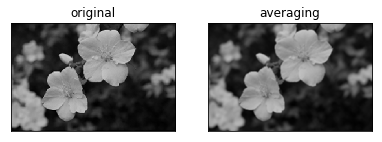

In [3]:


img = cv2.imread('flor.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

displayColor2(img,dst,"original","averaging")


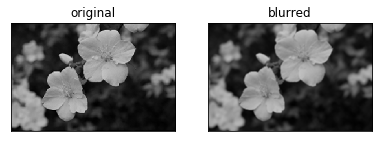

In [6]:
img = cv2.imread('flor.png')
blur = cv2.blur(img,(5,5))
displayColor2(img,blur,"original","blurred")

# **Filtrado y umbralización**

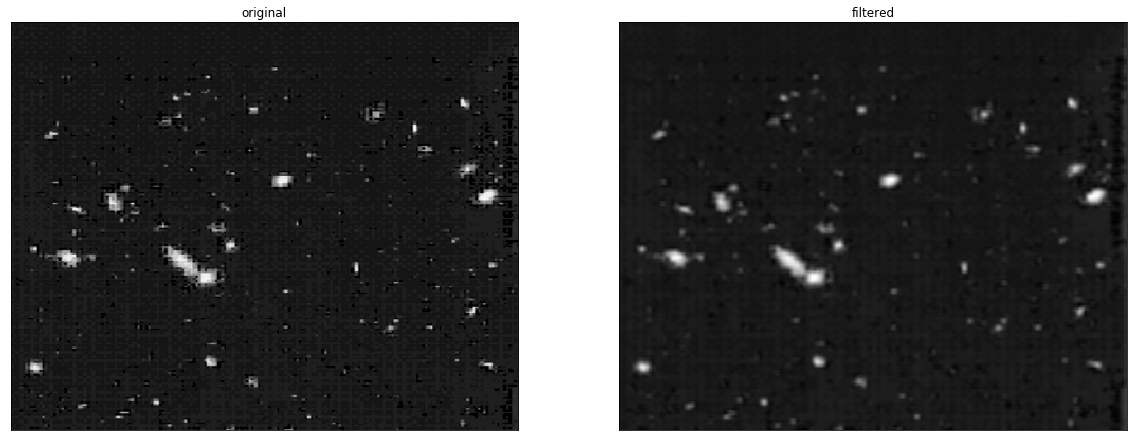

In [14]:
img = cv2.imread('manchas.png',0)
rows, columns = img.shape
blur = cv2.blur(img,(5,5))
displayGray2(img,blur,"original","filtered")

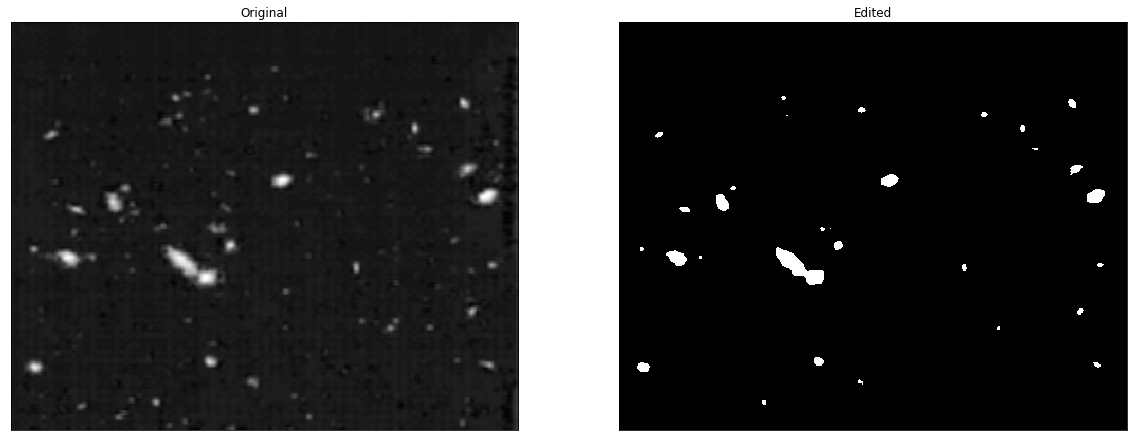

In [18]:
img2 = np.zeros( (rows, columns), dtype = np.uint8)

#intervalos
T = 100

for x in range(0,rows):
    for y in range(0,columns):
        r = blur[x][y]
        if T>=r:
            img2[x][y] = 0
        else:
            img2[x][y] = 255
displayGray2(blur,img2)

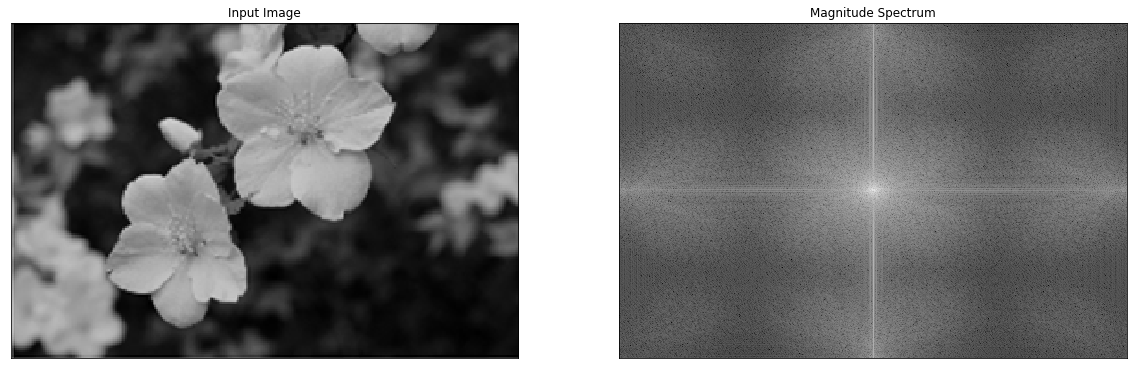

In [20]:
img = cv2.imread('flor.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))


displayGray2(img,magnitude_spectrum,"Input Image","Magnitude Spectrum")



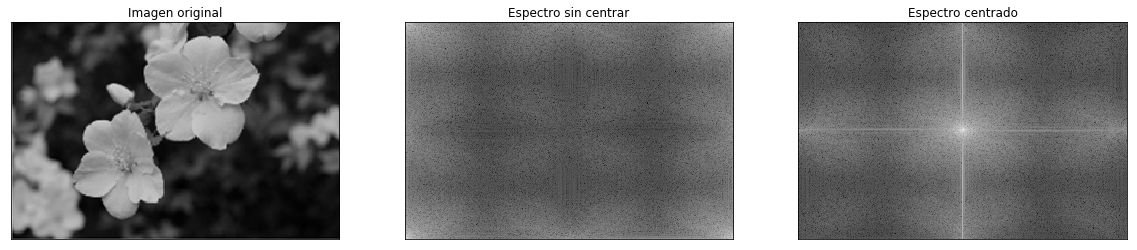

In [24]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitud_spectrum_c = 20*np.log(np.abs(fshift))
magnitud_spectrum_ori = 20*np.log(np.abs(f))

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitud_spectrum_ori, cmap = 'gray')
plt.title('Espectro sin centrar'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitud_spectrum_c, cmap = 'gray')
plt.title('Espectro centrado'), plt.xticks([]), plt.yticks([])
plt.show()


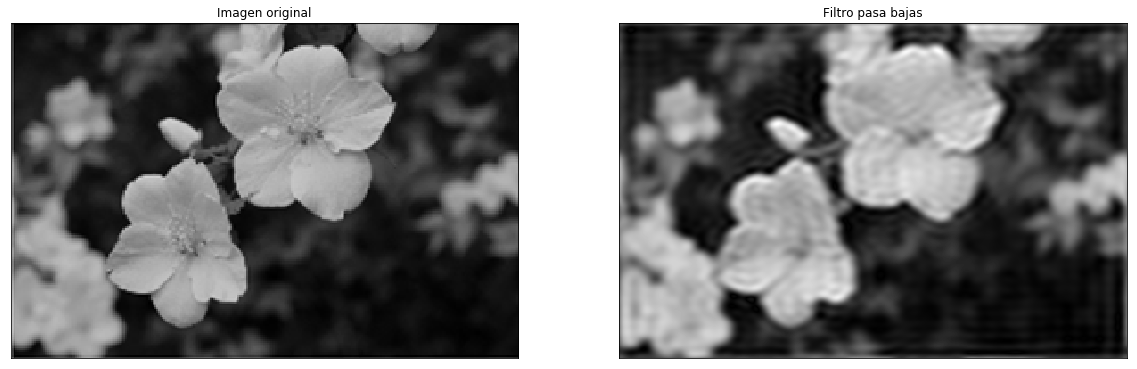

In [27]:

img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

##creemos una mascara con un centro cuadrado de 1 y el resto zeros
mask = np.zeros((fils,cols,2), np.uint8)
mask[np.int32(centfils)-30:np.int32(centfils)+30, np.int32(centcols)-30:np.int32(centcols)+30]=1

##Apliquemos la mascara y luego obtenemos la inversa DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtro pasa bajas'), plt.xticks([]), plt.yticks([])
plt.show()




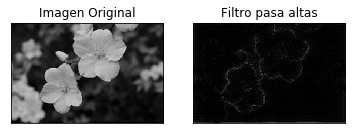

In [28]:

img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

##creemos una mascara con un centro cuadrado de 1 y el resto zeros
mask = np.ones((fils,cols,2), np.uint8)
mask[np.int32(centfils)-30:np.int32(centfils)+30, np.int32(centcols)-30:np.int32(centcols)+30]=0

#Apliquemos la mascara y luego obtenemos la inversa DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtro pasa altas'), plt.xticks([]), plt.yticks([])
plt.show()
